In [0]:
import pandas as pd

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#import excel depuis le drive
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
FAOstat_4 = gc.open_by_url('https://docs.google.com/spreadsheets/d/15bqMELKNOYTaPntdoy1FStUuZu4J6eQ1lpTh8XC7cmg/edit#gid=139383688')

In [0]:
temp_change = FAOstat_4 .worksheet('FAOSTAT_data_4-15-2020')
temp_change = temp_change.get_all_values()
temp_change  = pd.DataFrame(temp_change)

In [0]:
type(temp_change)

pandas.core.frame.DataFrame

In [0]:
temp_change.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Domain Code,Domain,Area Code,Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
1,ET,Temperature change,5000,World,7271,Temperature change,7020,Meteorological year,1961,1961,°C,0.207,Fc,Calculated data
2,ET,Temperature change,5000,World,7271,Temperature change,7020,Meteorological year,1962,1962,°C,0.034,Fc,Calculated data
3,ET,Temperature change,5000,World,7271,Temperature change,7020,Meteorological year,1963,1963,°C,0.159,Fc,Calculated data
4,ET,Temperature change,5000,World,7271,Temperature change,7020,Meteorological year,1964,1964,°C,-0.253,Fc,Calculated data


In [0]:
temp_change.columns = temp_change.iloc[0]

In [0]:
temp_change.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,Domain Code,Domain,Area Code,Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
1,ET,Temperature change,5000,World,7271,Temperature change,7020,Meteorological year,1961,1961,°C,0.207,Fc,Calculated data
2,ET,Temperature change,5000,World,7271,Temperature change,7020,Meteorological year,1962,1962,°C,0.034,Fc,Calculated data
3,ET,Temperature change,5000,World,7271,Temperature change,7020,Meteorological year,1963,1963,°C,0.159,Fc,Calculated data
4,ET,Temperature change,5000,World,7271,Temperature change,7020,Meteorological year,1964,1964,°C,-0.253,Fc,Calculated data


In [0]:
temp_change.drop(0, axis=0, inplace=True)

In [0]:
temp_change.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
1,ET,Temperature change,5000,World,7271,Temperature change,7020,Meteorological year,1961,1961,°C,0.207,Fc,Calculated data
2,ET,Temperature change,5000,World,7271,Temperature change,7020,Meteorological year,1962,1962,°C,0.034,Fc,Calculated data
3,ET,Temperature change,5000,World,7271,Temperature change,7020,Meteorological year,1963,1963,°C,0.159,Fc,Calculated data
4,ET,Temperature change,5000,World,7271,Temperature change,7020,Meteorological year,1964,1964,°C,-0.253,Fc,Calculated data
5,ET,Temperature change,5000,World,7271,Temperature change,7020,Meteorological year,1965,1965,°C,-0.226,Fc,Calculated data


In [0]:
col1 = temp_change['Year']
col2 = temp_change['Value']
temp_change_C_graph = pd.concat([col1 , col2], axis=1, keys=['Year', 'Value']).copy()

In [0]:
temp_change_C_graph.head()

,Year,Value
1,1961,0.207
2,1962,0.034
3,1963,0.159
4,1964,-0.253
5,1965,-0.226


In [0]:
temp_change_C_graph['Year'] = temp_change_C_graph['Year'].astype('int')
temp_change_C_graph['Value'] = temp_change_C_graph['Value'].astype('float')
temp_change_C_graph.dtypes

Year       int64
Value    float64
dtype: object

The FAOSTAT Temperature Change domain disseminates statistics of mean surface temperature change by country, with annual updates. The current dissemination covers the period 1961–2019. Statistics are available for monthly, seasonal and annual mean temperature anomalies, i.e., temperature change with respect to a baseline climatology, corresponding to the period 1951–1980. The standard deviation of the temperature change of the baseline methodology is also available. Data are based on the publicly available GISTEMP data, the Global Surface Temperature Change data distributed by the National Aeronautics and Space Administration Goddard Institute for Space Studies (NASA-GISS). Show Less

Food and Agriculture Organization of the United Nations (FAO)

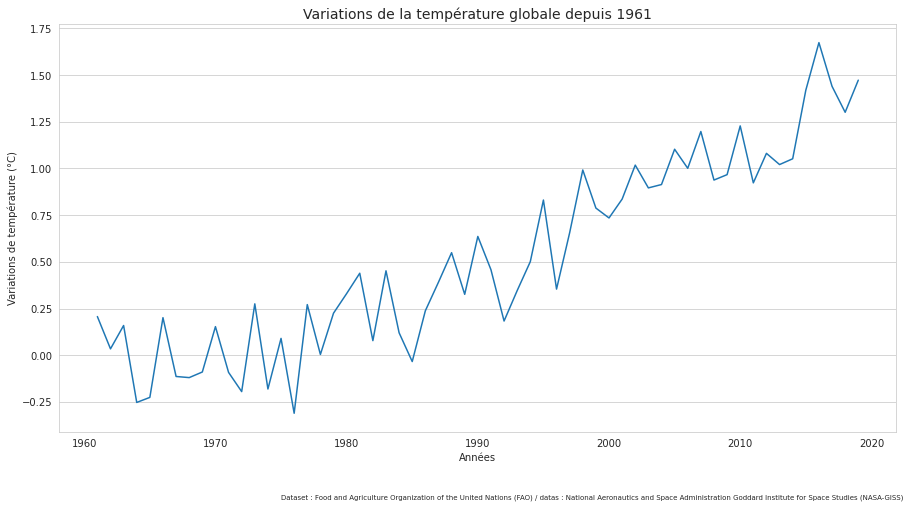

In [0]:
plt.figure(figsize=(15, 7.5))
g_temp = sns.lineplot(temp_change_C_graph['Year'], temp_change_C_graph['Value'], data=temp_change_C_graph, palette='cubehelix').grid(axis="x")

plt.title('Variations de la température globale depuis 1961', fontsize=14)
plt.ylabel('Variations de température (°C)')
plt.xlabel('Années')

plt.figtext(0.33, 0, 
            'Dataset : Food and Agriculture Organization of the United Nations (FAO) / datas : National Aeronautics and Space Administration Goddard Institute for Space Studies (NASA-GISS)',
            fontsize=7)

plt.show()

In [0]:
#export du df pour données graphique
from google.colab import drive
drive.mount('drive')

temp_change_C_graph.to_csv('Global_temp_anomaly.csv')
!cp Global_temp_anomaly.csv "drive/My Drive/"

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).
